In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')
#Librerias basicas para proyecciones
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pmdarima import auto_arima
import os
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
import warnings
warnings.filterwarnings('ignore')
import arch
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline
plt.style.use("classic")
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
datos = pd.read_excel('hh_mensual.xlsx')

In [3]:
datos

,Fecha,ConsumoAguaM3,ConsumoEnergíaKWh,ConsumoPapelResmasMes,ConsumoCombustibleTotal,ConsumoCombustibleFFijas,ConsumoCombustibleFMóviles,Energía M3,Papel M3,Combustible M3,HH Mensual
0,2016-01-31,9258,520258.0,596.125148,11642.878039,824.238039,10818.640000,41205.587356,2980.625740,582.143902,54026.356998
1,2016-02-29,13633,525991.0,1007.105473,30921.625207,2228.305207,28693.320000,41659.653670,5035.527364,1546.081260,61874.262294
2,2016-03-31,16603,692349.0,830.000000,37642.150195,1946.190195,35695.960000,54835.576196,4150.000000,1882.107510,77470.683706
3,2016-04-30,17846,711904.0,2115.000000,47140.460913,2363.840913,44776.620000,56384.375563,10575.000000,2357.023046,87162.398608
4,2016-05-31,17274,755482.0,251.000000,34421.075960,2425.975960,31995.100000,59835.849804,1255.000000,1721.053798,80085.903602
...,...,...,...,...,...,...,...,...,...,...,...
79,2022-08-31,14962,599443.6,204.000000,17793.408276,500.476078,17292.932198,47477.262483,1020.000000,889.670414,64348.932897
80,2022-09-30,17862,714349.6,39.000000,29497.048830,500.476078,28996.572752,56578.072506,195.000000,1474.852442,76109.924948
81,2022-10-31,21897,704331.0,632.000000,29632.182933,500.476078,29131.706855,55784.577168,3160.000000,1481.609147,82323.186315
82,2022-11-30,17880,734474.0,2360.000000,30030.009189,333.650719,29696.358471,58171.969615,11800.000000,1501.500459,89353.470075


In [4]:
index = pd.Index(sm.tsa.datetools.dates_from_range("2016M1", "2022M12"))    
datos.set_index(index, inplace=True)

In [5]:
datos.drop("Fecha", axis = 1, inplace = True)

In [6]:
datos.head()

,ConsumoAguaM3,ConsumoEnergíaKWh,ConsumoPapelResmasMes,ConsumoCombustibleTotal,ConsumoCombustibleFFijas,ConsumoCombustibleFMóviles,Energía M3,Papel M3,Combustible M3,HH Mensual
2016-01-31,9258,520258.0,596.125148,11642.878039,824.238039,10818.64,41205.587356,2980.625740,582.143902,54026.356998
2016-02-29,13633,525991.0,1007.105473,30921.625207,2228.305207,28693.32,41659.653670,5035.527364,1546.081260,61874.262294
2016-03-31,16603,692349.0,830.000000,37642.150195,1946.190195,35695.96,54835.576196,4150.000000,1882.107510,77470.683706
2016-04-30,17846,711904.0,2115.000000,47140.460913,2363.840913,44776.62,56384.375563,10575.000000,2357.023046,87162.398608
2016-05-31,17274,755482.0,251.000000,34421.075960,2425.975960,31995.10,59835.849804,1255.000000,1721.053798,80085.903602


### HH Agua

In [7]:
consumo_agua_2017 = datos["ConsumoAguaM3"].loc["2017-01-31":"2017-12-31"]
consumo_agua_2018 = datos["ConsumoAguaM3"].loc["2018-01-31":"2018-12-31"]
consumo_agua_2019 = datos["ConsumoAguaM3"].loc["2019-01-31":"2019-12-31"]
consumo_agua_2020 = datos["ConsumoAguaM3"].loc["2020-01-31":"2020-12-31"]
consumo_agua_2021 = datos["ConsumoAguaM3"].loc["2021-01-31":"2021-12-31"]
consumo_agua_2022 = datos["ConsumoAguaM3"].loc["2022-01-31":"2022-12-31"]

### HH Energía

In [8]:
consumo_ener_2017 = datos["ConsumoEnergíaKWh"].loc["2017-01-31":"2017-12-31"]/277.77*22
consumo_ener_2018 = datos["ConsumoEnergíaKWh"].loc["2018-01-31":"2018-12-31"]/277.77*22
consumo_ener_2019 = datos["ConsumoEnergíaKWh"].loc["2019-01-31":"2019-12-31"]/277.77*22
consumo_ener_2020 = datos["ConsumoEnergíaKWh"].loc["2020-01-31":"2020-12-31"]/277.77*22
consumo_ener_2021 = datos["ConsumoEnergíaKWh"].loc["2021-01-31":"2021-12-31"]/277.77*22
consumo_ener_2022 = datos["ConsumoEnergíaKWh"].loc["2022-01-31":"2022-12-31"]/277.77*22

### HH Papel

In [9]:
consumo_papel_2017 = datos["ConsumoPapelResmasMes"].loc["2017-01-31":"2017-12-31"]*5
consumo_papel_2018 = datos["ConsumoPapelResmasMes"].loc["2018-01-31":"2018-12-31"]*5
consumo_papel_2019 = datos["ConsumoPapelResmasMes"].loc["2019-01-31":"2019-12-31"]*5
consumo_papel_2020 = datos["ConsumoPapelResmasMes"].loc["2020-01-31":"2020-12-31"]*5
consumo_papel_2021 = datos["ConsumoPapelResmasMes"].loc["2021-01-31":"2021-12-31"]*5
consumo_papel_2022 = datos["ConsumoPapelResmasMes"].loc["2022-01-31":"2022-12-31"]*5

### HH Combustible

In [10]:
consumo_combus_2017 = datos["ConsumoCombustibleFMóviles"].loc["2017-01-31":"2017-12-31"]*0.05
consumo_combus_2018 = datos["ConsumoCombustibleFMóviles"].loc["2018-01-31":"2018-12-31"]*0.05
consumo_combus_2019 = datos["ConsumoCombustibleFMóviles"].loc["2019-01-31":"2019-12-31"]*0.05
consumo_combus_2020 = datos["ConsumoCombustibleFMóviles"].loc["2020-01-31":"2020-12-31"]*0.05
consumo_combus_2021 = datos["ConsumoCombustibleFMóviles"].loc["2021-01-31":"2021-12-31"]*0.05
consumo_combus_2022 = datos["ConsumoCombustibleFMóviles"].loc["2022-01-31":"2022-12-31"]*0.05

### HH Azul Anual

In [11]:
hh_2017 = consumo_agua_2017 + consumo_ener_2017 + consumo_papel_2017 + consumo_combus_2017
hh_2018 = consumo_agua_2018 + consumo_ener_2018 + consumo_papel_2018 + consumo_combus_2018
hh_2019 = consumo_agua_2019 + consumo_ener_2019 + consumo_papel_2019 + consumo_combus_2019
hh_2020 = consumo_agua_2020 + consumo_ener_2020 + consumo_papel_2020 + consumo_combus_2020
hh_2021 = consumo_agua_2021 + consumo_ener_2021 + consumo_papel_2021 + consumo_combus_2021
hh_2022 = consumo_agua_2022 + consumo_ener_2022 + consumo_papel_2022 + consumo_combus_2022

In [12]:
hh_2017.mean()

79025.39900035765

In [13]:
hh_2018.mean()

86454.67018709007

In [14]:
hh_2019.mean()

87218.78739719813

In [15]:
hh_2020.mean()

63902.96694171393

In [16]:
hh_2021.mean()

61906.26775810172

In [17]:
hh_2022.mean()

70999.66096276976

In [18]:
hh_2017 = hh_2017.sum()
hh_2018 = hh_2018.sum()
hh_2019 = hh_2019.sum()
hh_2020 = hh_2020.sum()
hh_2021 = hh_2021.sum()
hh_2022 = hh_2022.sum()

In [19]:
hh_azul_anual = pd.DataFrame([hh_2017,hh_2018,hh_2019,hh_2020,hh_2021,hh_2022])

In [20]:
hh_azul_anual.columns = ["HH_anualM3"]
index = pd.Index(sm.tsa.datetools.dates_from_range("2016", "2021"))    
hh_azul_anual.set_index(index, inplace=True)

In [21]:
hh_azul_anual

,HH_anualM3
2016-12-31,9.483048e+05
2017-12-31,1.037456e+06
2018-12-31,1.046625e+06
2019-12-31,7.668356e+05
2020-12-31,7.428752e+05
2021-12-31,8.519959e+05


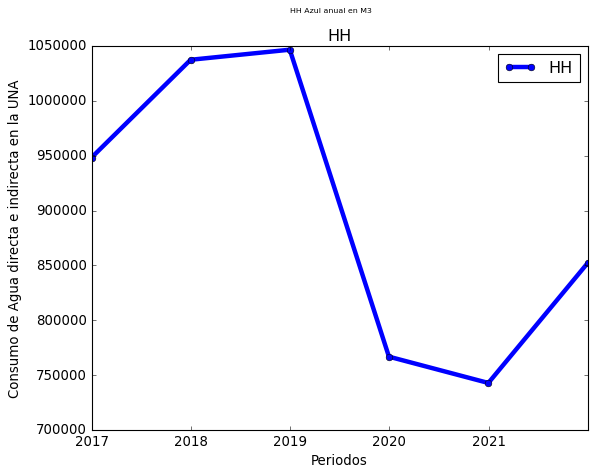

In [22]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('HH Azul anual en M3', fontsize =7)

ax1.plot(hh_azul_anual.index,
         hh_azul_anual['HH_anualM3'],
         '-o',  color = 'blue', label = 'HH', linewidth=4)
ax1.set(xlabel= 'Periodos', ylabel= 'Consumo de Agua directa e indirecta en la UNA')
ax1.set_title('HH')
ax1.legend(loc='best')

plt.show()

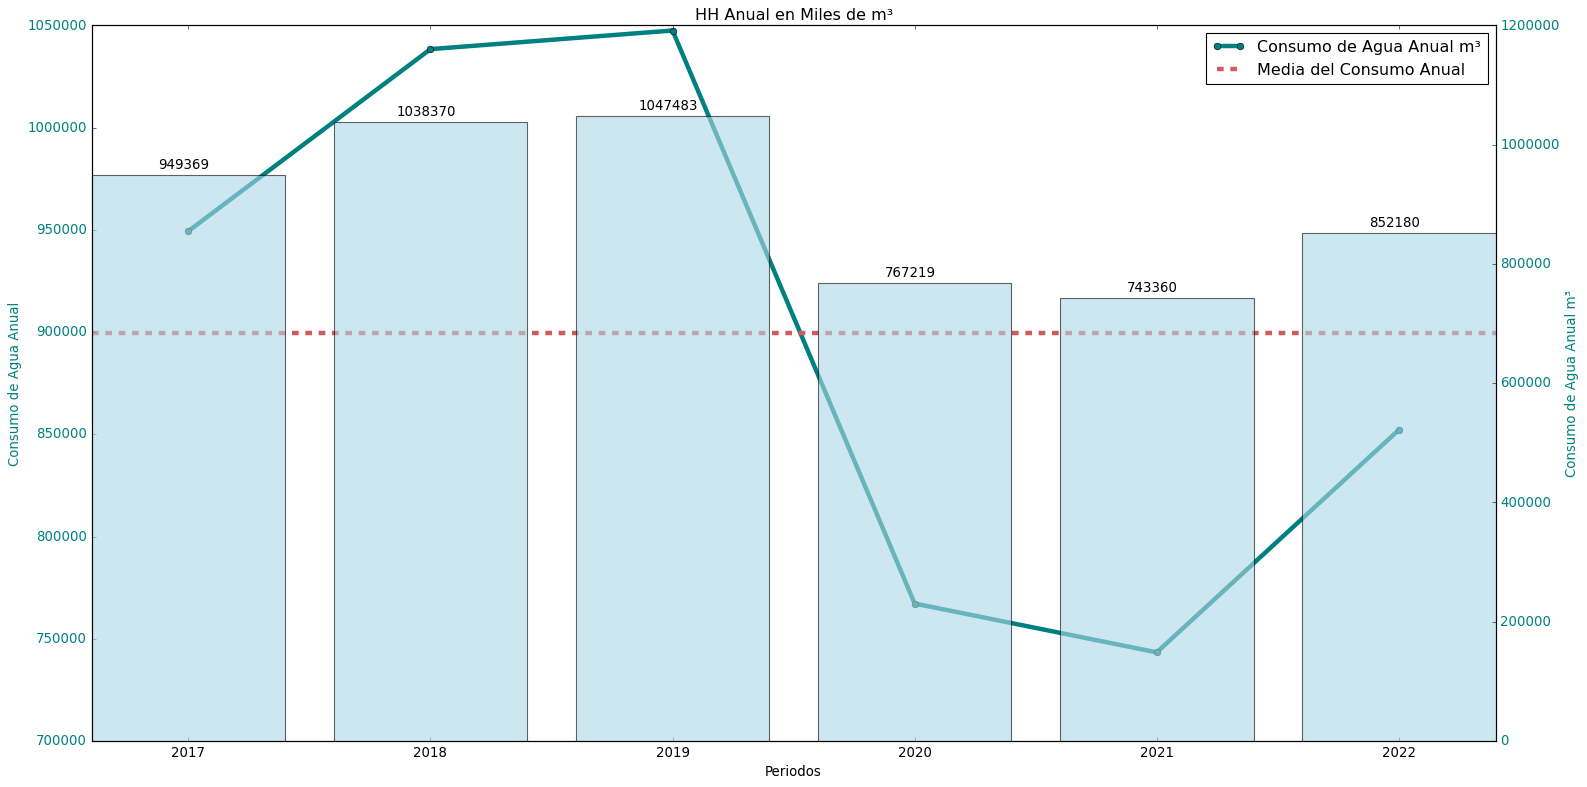

In [23]:
# Sample data
x = np.array(['2017', '2018', '2019', '2020', "2021", "2022"])
y_line = np.array([round(9.493694e+05), round(1.038370e+06),
                   round(1.047483e+06), round(7.672186e+05),
                   round(7.433599e+05), round(8.521795e+05)])
y_bar = np.array([round(9.493694e+05), round(1.038370e+06),
                  round(1.047483e+06), round(7.672186e+05),
                  round(7.433599e+05), round(8.521795e+05)])

# Create a figure and two subplots (axes)
fig, ax1 = plt.subplots(1,figsize=(20, 10)) 
# Create the line plot on the first subplot (ax1)
ax1.plot(x, y_line,
         '-o',linewidth=4, color='teal', label='Consumo de Agua Anual m³')
ax1.set_xlabel('Periodos')
ax1.set_ylabel('Consumo de Agua Anual', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Create a second subplot (ax2) sharing the same x-axis
ax2 = ax1.twinx()

# Create the bar graph on the second subplot (ax2)
bars = ax2.bar(x, y_bar, color='lightblue', alpha=0.6, label='Consumo de Agua Percápita m³')
ax2.set_ylabel('Consumo de Agua Anual m³', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

for bar, label in zip(bars, y_bar):
    height = bar.get_height()
    ax2.annotate(f'{label}', xy=(bar.get_x() + bar.get_width() / 2.1, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

ax1.axhline(y=y_line.mean(), color='indianred', linestyle='--', label='Media del Consumo Anual',linewidth=4)
    
# Add legends for both plots
ax1.legend(loc='best')

# Add a title
plt.title('HH Anual en Miles de m³')

# Show the plot
plt.tight_layout()
plt.show()

### HH Percápita Anual

Total = Personal + Estudiantes 

Personal = Planilla (Tomado el dato a final de cada año, diciembre)

In [24]:
total_2017 = 32298
total_2018 = 31438
total_2019 = 31095
total_2020 = 23715
total_2021 = 23458
total_2022 = 23899

In [25]:
personal_2017 = 3622
personal_2018 = 3962
personal_2019 = 4023
personal_2020 = 3600
personal_2021 = 3603
personal_2022 = 3555

In [26]:
hh_percapita_anual_2017 = consumo_agua_2017/total_2017 + consumo_ener_2017/total_2017 + consumo_papel_2017/personal_2017 + consumo_combus_2017/personal_2017
hh_percapita_anual_2018 = consumo_agua_2018/total_2018 + consumo_ener_2018/total_2018 + consumo_papel_2018/personal_2018 + consumo_combus_2018/personal_2018
hh_percapita_anual_2019 = consumo_agua_2019/total_2019 + consumo_ener_2019/total_2019 + consumo_papel_2019/personal_2019 + consumo_combus_2019/personal_2019
hh_percapita_anual_2020 = consumo_agua_2020/total_2020 + consumo_ener_2020/total_2020 + consumo_papel_2020/personal_2020 + consumo_combus_2020/personal_2020
hh_percapita_anual_2021 = consumo_agua_2021/total_2021 + consumo_ener_2021/total_2021 + consumo_papel_2021/personal_2021 + consumo_combus_2021/personal_2021
hh_percapita_anual_2022 = consumo_agua_2022/total_2022 + consumo_ener_2022/total_2022 + consumo_papel_2022/personal_2022 + consumo_combus_2022/personal_2022

In [27]:
hh_percapita_anual_2017 = hh_percapita_anual_2017.sum()
hh_percapita_anual_2018 = hh_percapita_anual_2018.sum()
hh_percapita_anual_2019 = hh_percapita_anual_2019.sum()
hh_percapita_anual_2020 = hh_percapita_anual_2020.sum()
hh_percapita_anual_2021 = hh_percapita_anual_2021.sum()
hh_percapita_anual_2022 = hh_percapita_anual_2022.sum()

In [28]:
hh_percapita_anual = pd.DataFrame([hh_percapita_anual_2017,hh_percapita_anual_2018,hh_percapita_anual_2019,hh_percapita_anual_2020,hh_percapita_anual_2021,hh_percapita_anual_2022])
hh_percapita_anual.columns = ["HH_percapitaM3"]
index = pd.Index(sm.tsa.datetools.dates_from_range("2016", "2021"))    
hh_percapita_anual.set_index(index, inplace=True)
hh_percapita_anual

,HH_percapitaM3
2016-12-31,49.436865
2017-12-31,51.586193
2018-12-31,48.762953
2019-12-31,43.685661
2020-12-31,39.535724
2021-12-31,44.981361


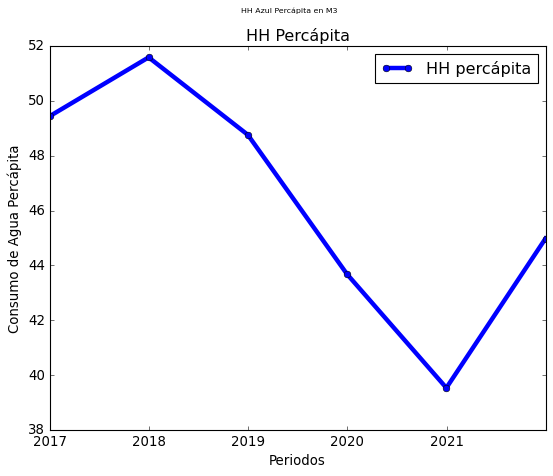

In [29]:
categories = ['2017', '2018', '2019', '2020', "2021", "2022"]
values = [49.436865,51.586193,48.762953,43.685661,39.535724,44.981361]

fig, (ax1) = plt.subplots(1)
fig.suptitle('HH Azul Percápita en M3', fontsize =7)

ax1.plot(hh_percapita_anual.index,
         hh_percapita_anual['HH_percapitaM3'],
         '-o',  color = 'blue', label = 'HH percápita', linewidth=4)
ax1.set(xlabel= 'Periodos', ylabel= 'Consumo de Agua Percápita')
ax1.set_title('HH Percápita')
ax1.legend(loc='best')




plt.show()

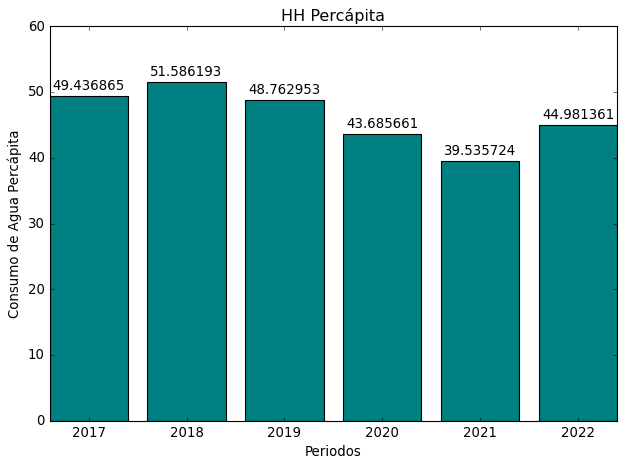

In [30]:
categories = ['2017', '2018', '2019', '2020', "2021", "2022"]
values = [49.436865,51.586193,48.762953,43.685661,39.535724,44.981361]
fig, ax = plt.subplots()

# Set the style of the plot

# Create the bar plot
bars = ax.bar(categories,values, color='teal')


# Add labels and a title
ax.set_xlabel('Periodos')
ax.set_ylabel('Consumo de Agua Percápita')
ax.set_title('HH Percápita')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

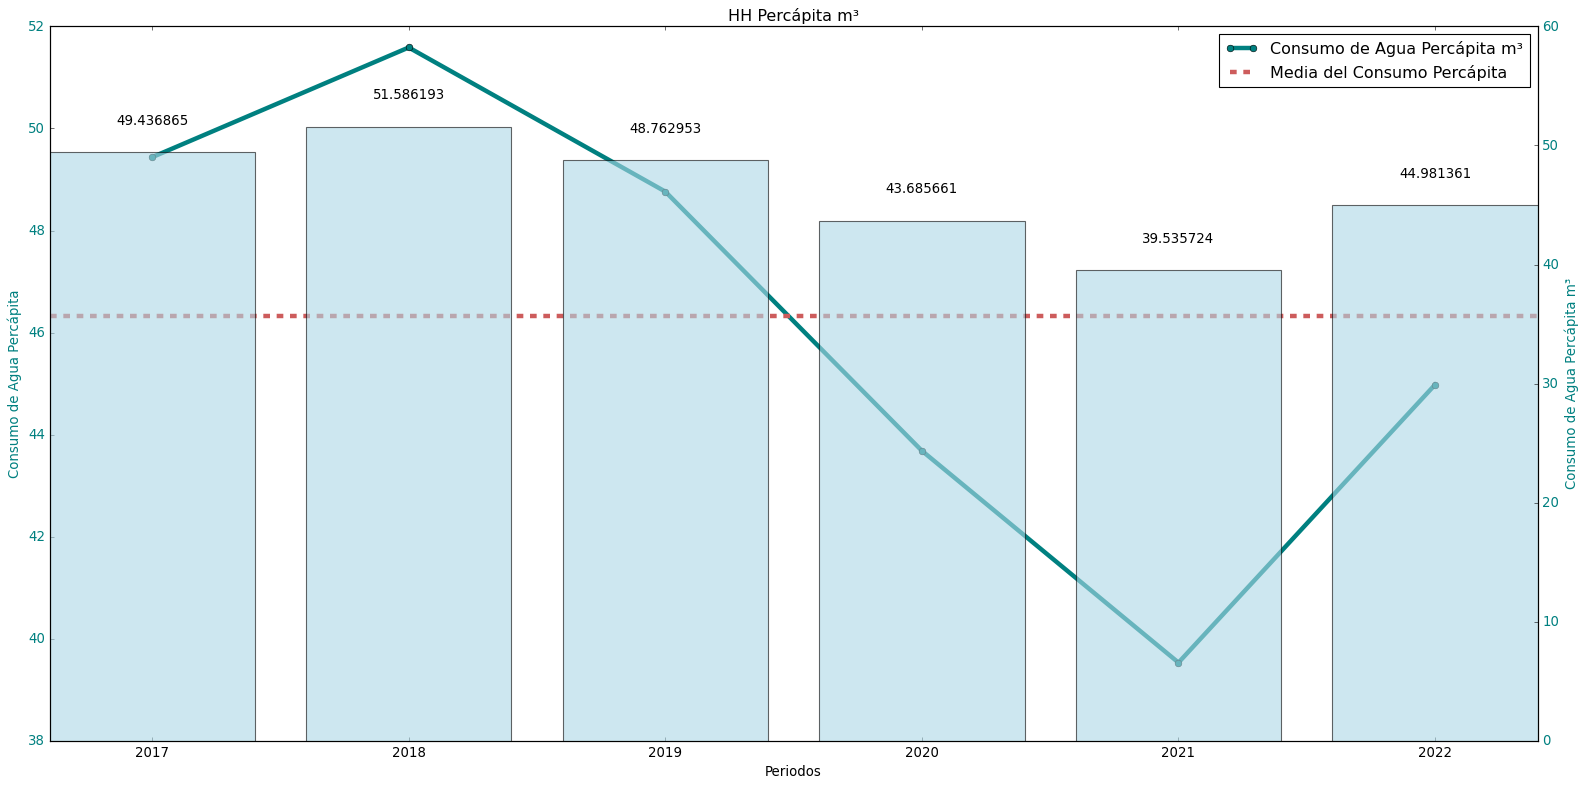

In [31]:
# Sample data
x = np.array(['2017', '2018', '2019', '2020', "2021", "2022"])
y_line = np.array([49.436865,51.586193,48.762953,43.685661,39.535724,44.981361])
y_bar = np.array([49.436865,51.586193,48.762953,43.685661,39.535724,44.981361])


# Create a figure and two subplots (axes)
fig, ax1 = plt.subplots(1,figsize=(20, 10)) 
# Create the line plot on the first subplot (ax1)
ax1.plot(x, y_line,
         '-o',linewidth=4, color='teal', label='Consumo de Agua Percápita m³')
ax1.set_xlabel('Periodos')
ax1.set_ylabel('Consumo de Agua Percápita', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Create a second subplot (ax2) sharing the same x-axis
ax2 = ax1.twinx()

# Create the bar graph on the second subplot (ax2)
bars = ax2.bar(x, y_bar, color='lightblue', alpha=0.6, label='Consumo de Agua Percápita m³')
ax2.set_ylabel('Consumo de Agua Percápita m³', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

for bar, label in zip(bars, y_bar):
    height = bar.get_height()
    ax2.annotate(f'{label}', xy=(bar.get_x() + bar.get_width() / 2, height+1.8),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

ax1.axhline(y=y_line.mean(), color='indianred', linestyle='--', label='Media del Consumo Percápita',linewidth=4)
    
# Add legends for both plots
ax1.legend(loc='best')

# Add a title
plt.title('HH Percápita m³')

# Show the plot
plt.tight_layout()
plt.show()